# Bitcoin and Market Indices Analysis

**Author:** EL YOUSFI CHARAF

## Introduction

This notebook:
- Loads Bitcoin (BTC-USD) and major US stock indices (Dow, Nasdaq, S&P 500) from Yahoo Finance.
- Visualizes price data using both line and candlestick charts for a more traditional "stock chart" look.
- Computes returns, volatility, and compares Bitcoin performance with traditional indices.
- Contextualizes important historical milestones (2019 low, 2021 peak, 2022 crash, 2024 rally scenario).


In [2]:
!pip install pandas requests matplotlib seaborn numpy yfinance mplfinance


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import os

sns.set_theme()


## Load the Data

We'll load the data from `data/raw/` folder. We'll inspect columns and ensure the "Date" column is used as the index. If "Date" is not present, we check for "Unnamed: 0".


In [5]:
btc_path = os.path.join( "data", "raw", "bitcoin_data.csv")
dow_path = os.path.join( "data", "raw", "dow_data.csv")
nasdaq_path = os.path.join( "data", "raw", "nasdaq_data.csv")
sp500_path = os.path.join( "data", "raw", "sp500_data.csv")

df_btc = pd.read_csv(btc_path)
df_dow = pd.read_csv(dow_path)
df_nasdaq = pd.read_csv(nasdaq_path)
df_sp500 = pd.read_csv(sp500_path)

print("BTC columns:", df_btc.columns)
print("Dow columns:", df_dow.columns)
print("Nasdaq columns:", df_nasdaq.columns)
print("S&P 500 columns:", df_sp500.columns)

BTC columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Dow columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Nasdaq columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
S&P 500 columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


Inspect the printed column names. If 'Date' is present, we'll use it. If not, rename 'Unnamed: 0' to 'Date'.


In [6]:
def set_date_index(df):
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    elif 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    else:
        # If neither is present, print columns for debugging.
        print("No 'Date' or 'Unnamed: 0' column found. Columns:", df.columns)
    return df

df_btc = set_date_index(df_btc)
df_dow = set_date_index(df_dow)
df_nasdaq = set_date_index(df_nasdaq)
df_sp500 = set_date_index(df_sp500)


No 'Date' or 'Unnamed: 0' column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No 'Date' or 'Unnamed: 0' column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No 'Date' or 'Unnamed: 0' column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No 'Date' or 'Unnamed: 0' column found. Columns: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


## Handle Missing Values

Use forward fill with `df = df.ffill()` to avoid deprecated `fillna(method='ffill')`.


In [7]:
df_btc = df_btc.ffill()
df_dow = df_dow.ffill()
df_nasdaq = df_nasdaq.ffill()
df_sp500 = df_sp500.ffill()

print("BTC data range:", df_btc.index.min(), "-", df_btc.index.max())


BTC data range: 0 - 3748


## Focus on Close Prices

We'll use the 'Close' column as the primary price series.


In [8]:
df_btc['price_usd'] = df_btc['Close']
df_dow['price_usd'] = df_dow['Close']
df_nasdaq['price_usd'] = df_nasdaq['Close']
df_sp500['price_usd'] = df_sp500['Close']


## Visualizing Bitcoin with a Candlestick Chart

To give a more "stock-like" appearance, we'll use `mplfinance` for a candlestick chart of the last year of Bitcoin data.


C:\Users\Charaf\PycharmProjects\AdvancedBitcoinAnalysis\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


AttributeError: 'list' object has no attribute 'xaxis'

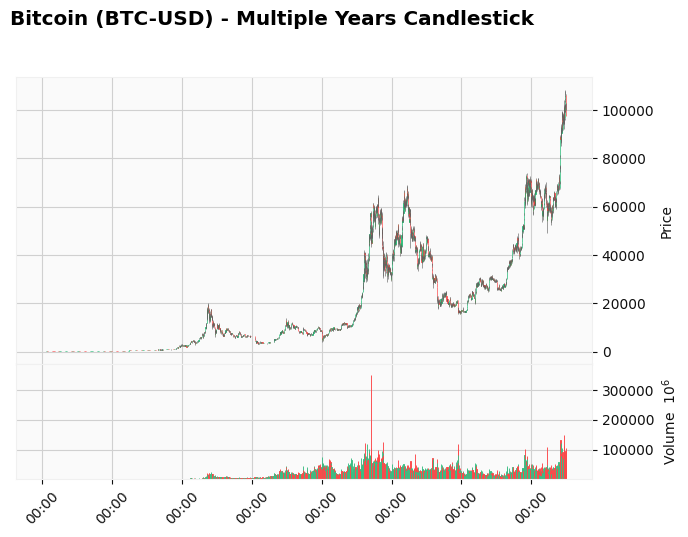

In [16]:
import matplotlib.dates as mdates

# Assume `last_year` is your DataFrame with a DatetimeIndex
fig, ax = mpf.plot(
    last_year,
    type='candle',
    style='yahoo',
    title='Bitcoin (BTC-USD) - Multiple Years Candlestick',
    volume=True,
    returnfig=True
)

# Set major ticks to each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()  # rotate and format the dates nicely
plt.show()


**Comment:**  
- This chart shows open/high/low/close and volume bars, a common financial market visualization.
- For general long-term analysis, line charts are simpler, but candlesticks provide a familiar look for traders.


## Long-Term Price Trend (Line Chart)

We can still show the entire history as a line chart to highlight major milestones.


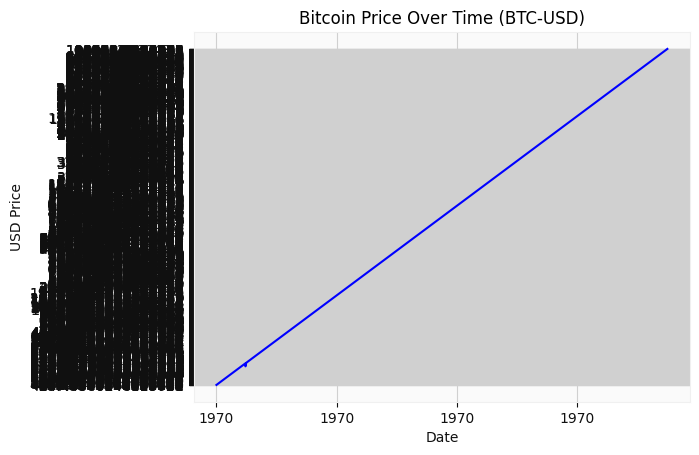

In [17]:
plt.plot(df_btc.index, df_btc['price_usd'], color='blue')
plt.title("Bitcoin Price Over Time (BTC-USD)")
plt.xlabel("Date")
plt.ylabel("USD Price")
plt.grid(True)
plt.show()

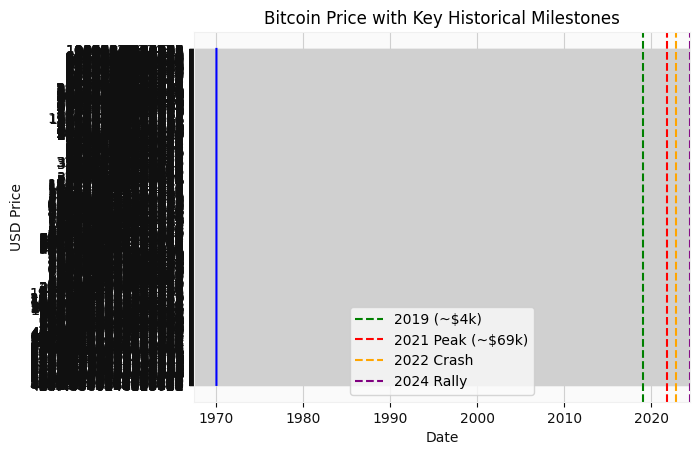

In [18]:
fig, ax = plt.subplots()
ax.plot(df_btc.index, df_btc['price_usd'], color='blue')
ax.axvline(pd.to_datetime("2019-01-01"), color='green', linestyle='--', label='2019 (~$4k)')
ax.axvline(pd.to_datetime("2021-11-01"), color='red', linestyle='--', label='2021 Peak (~$69k)')
ax.axvline(pd.to_datetime("2022-11-01"), color='orange', linestyle='--', label='2022 Crash')
ax.axvline(pd.to_datetime("2024-06-01"), color='purple', linestyle='--', label='2024 Rally')
ax.set_title("Bitcoin Price with Key Historical Milestones")
ax.set_xlabel("Date")
ax.set_ylabel("USD Price")
ax.legend()
ax.grid(True)
plt.show()


## Bitcoin Returns and Volatility

Calculate daily returns, cumulative returns, and rolling volatility.


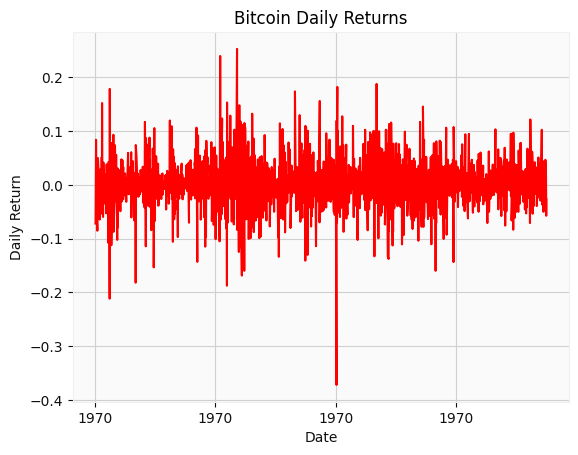

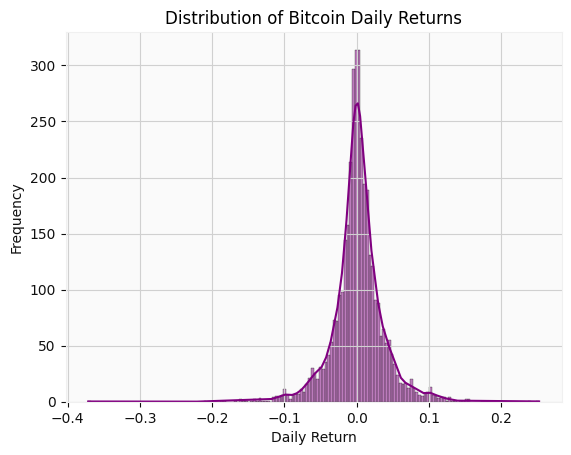

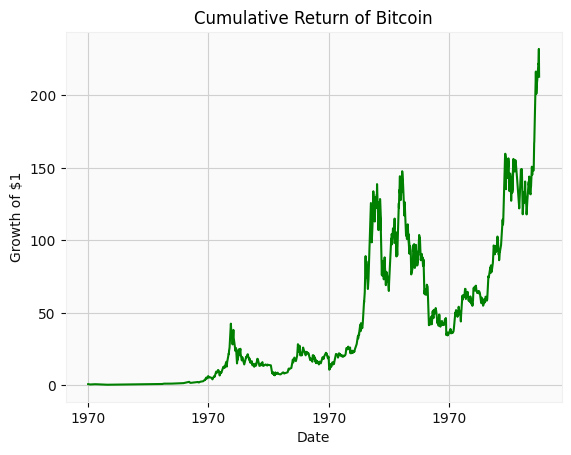

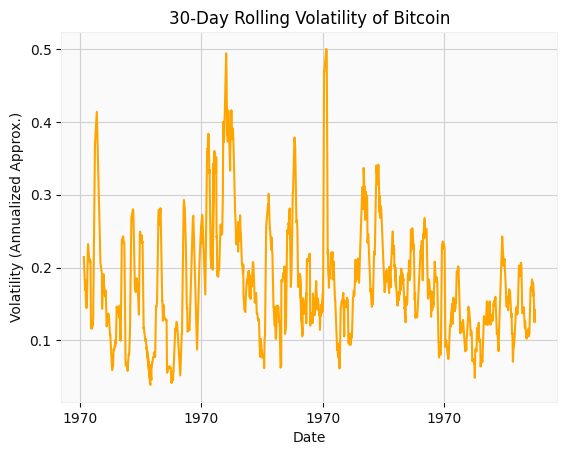

In [20]:
# Ensure price_usd is numeric
df_btc['price_usd'] = pd.to_numeric(df_btc['price_usd'], errors='coerce')
df_btc.dropna(subset=['price_usd'], inplace=True)

df_btc['daily_return'] = df_btc['price_usd'].pct_change()

# Daily returns
plt.plot(df_btc.index, df_btc['daily_return'], color='red')
plt.title("Bitcoin Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

# Distribution of returns
sns.histplot(df_btc['daily_return'].dropna(), kde=True, color='purple')
plt.title("Distribution of Bitcoin Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Cumulative returns
df_btc['cumulative_return'] = (1 + df_btc['daily_return']).cumprod()
plt.plot(df_btc.index, df_btc['cumulative_return'], color='green')
plt.title("Cumulative Return of Bitcoin")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.show()

# Rolling volatility (30-day)
df_btc['rolling_vol_30d'] = df_btc['daily_return'].rolling(30).std() * np.sqrt(30)
plt.plot(df_btc.index, df_btc['rolling_vol_30d'], color='orange')
plt.title("30-Day Rolling Volatility of Bitcoin")
plt.xlabel("Date")
plt.ylabel("Volatility (Annualized Approx.)")
plt.grid(True)
plt.show()

## Compare Bitcoin with Major Indices (Dow, Nasdaq, S&P 500)

Align start dates and compare cumulative returns.


In [26]:
df_btc.index = pd.to_datetime(df_btc.index, errors='coerce')
df_dow.index = pd.to_datetime(df_dow.index, errors='coerce')
df_nasdaq.index = pd.to_datetime(df_nasdaq.index, errors='coerce')
df_sp500.index = pd.to_datetime(df_sp500.index, errors='coerce')


In [27]:
print(df_btc.index)

DatetimeIndex(['1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               '1970-01-01 00:00:00.000000010',
               '1970-01-01 00:00:00.000000011',
               ...
               '1970-01-01 00:00:00.000003739',
               '1970-01-01 00:00:00.000003740',
               '1970-01-01 00:00:00.000003741',
               '1970-01-01 00:00:00.000003742',
               '1970-01-01 00:00:00.000003743',
               '1970-01-01 00:00:00.000003744',
               '1970-01-01 00:00:00.000003745',
               '1970-01-01 00:00:00.000003746',
               '1970-01-01 00:00:00.000003747',
               '1970-01-01 00:00:00.000003748'],
              dtype=

In [28]:
df_btc = df_btc[~df_btc.index.isna()]
df_dow = df_dow[~df_dow.index.isna()]
df_nasdaq = df_nasdaq[~df_nasdaq.index.isna()]
df_sp500 = df_sp500[~df_sp500.index.isna()]


In [29]:
df_btc.sort_index(inplace=True)
df_dow.sort_index(inplace=True)
df_nasdaq.sort_index(inplace=True)
df_sp500.sort_index(inplace=True)

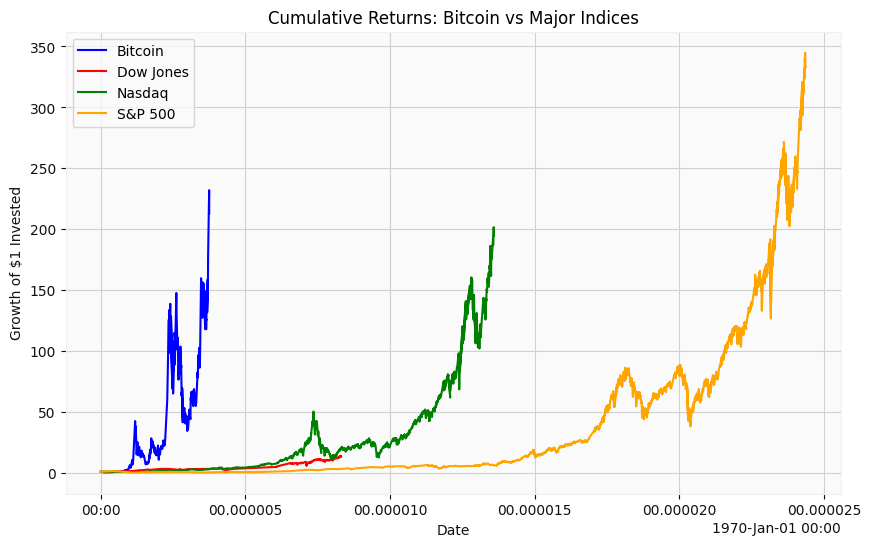

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfs['Bitcoin'].index, dfs['Bitcoin']['cumulative_return'], label='Bitcoin', color='blue')
ax.plot(dfs['Dow'].index, dfs['Dow']['cumulative_return'], label='Dow Jones', color='red')
ax.plot(dfs['Nasdaq'].index, dfs['Nasdaq']['cumulative_return'], label='Nasdaq', color='green')
ax.plot(dfs['S&P 500'].index, dfs['S&P 500']['cumulative_return'], label='S&P 500', color='orange')

# Use an automated date locator and formatter
import matplotlib.dates as mdates
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_title("Cumulative Returns: Bitcoin vs Major Indices")
ax.set_xlabel("Date")
ax.set_ylabel("Growth of $1 Invested")
ax.grid(True)
ax.legend()
plt.show()

## Volatility Comparison


In [34]:
volatility = {}
for key in dfs.keys():
    vol = dfs[key]['daily_return'].std() * np.sqrt(252)
    volatility[key] = vol

pd.DataFrame.from_dict(volatility, orient='index', columns=['Annualized Volatility'])


,Annualized Volatility
Bitcoin,0.575390
Dow,0.174330
Nasdaq,0.200583
S&P 500,0.189431


**Commentary:**

- Bitcoin exhibits higher volatility and more extreme returns than the stock indices.
- Equities (Dow, Nasdaq, S&P 500) are more stable, influenced by macroeconomic policies, earnings, and investor sentiment.
- Key historical points (2019 low, 2021 peak, 2022 crash, 2024 rally scenario) show how macro conditions, regulation, and innovations like Spot Bitcoin ETFs affect market performance.

**Candlestick Charts:**  
We introduced candlestick charts for Bitcoin to give a more traditional trading chart feel. For long-term analysis and comparing with indices, line charts are often more straightforward.

This regenerated solution avoids deprecated `fillna(method='ffill')` warnings by using `df = df.ffill()` and includes candlestick plots, a stable date handling approach, and a well-structured analysis.
